In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1 = pd.read_parquet('presentation_data/yellow_tripdata_2023-01.parquet', engine='pyarrow')
df2 = pd.read_parquet('presentation_data/yellow_tripdata_2023-02.parquet', engine='pyarrow')
df3 = pd.read_parquet('presentation_data/yellow_tripdata_2023-03.parquet', engine='pyarrow')
df4 = pd.read_parquet('presentation_data/yellow_tripdata_2023-04.parquet', engine='pyarrow')
df5 = pd.read_parquet('presentation_data/yellow_tripdata_2023-05.parquet', engine='pyarrow')

In [4]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1 = df1.sort_values(by='tpep_pickup_datetime')
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2138036,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,N,132,230,2,70.0,0.0,0.5,0.00,6.55,1.0,80.55,2.5,0.0
209091,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,N,7,7,2,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0
10023,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,N,1,1,2,120.0,0.0,0.0,0.00,0.00,0.3,120.30,0.0,0.0
18219,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,N,17,17,1,45.0,0.0,0.0,9.06,0.00,0.3,54.36,0.0,0.0
21660,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,N,48,264,1,75.0,0.0,0.0,15.06,0.00,0.3,90.36,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994844,2,2023-02-01 00:00:40,2023-02-01 00:23:03,5.0,10.12,1.0,N,70,75,1,40.8,1.0,0.5,5.08,0.00,1.0,50.88,2.5,0.0
2993558,2,2023-02-01 00:00:55,2023-02-01 00:06:33,1.0,1.09,1.0,N,246,164,2,7.9,1.0,0.5,0.00,0.00,1.0,12.90,2.5,0.0
2992642,2,2023-02-01 00:01:10,2023-02-01 00:14:26,1.0,2.03,1.0,N,230,162,1,13.5,1.0,0.5,3.70,0.00,1.0,22.20,2.5,0.0
2929496,2,2023-02-01 00:13:10,2023-02-01 00:29:37,1.0,3.27,1.0,N,230,4,1,19.1,0.0,0.5,4.62,0.00,1.0,27.72,2.5,0.0


In [5]:
#THERE ARE SOME WRONG DATES
df1a = df1[(df1['tpep_pickup_datetime'] >= '2023-01-01') & (df1['tpep_pickup_datetime'] < '2023-02-01')]
df2a = df2[(df2['tpep_pickup_datetime'] >= '2023-02-01') & (df2['tpep_pickup_datetime'] < '2023-03-01')]
df3a = df3[(df3['tpep_pickup_datetime'] >= '2023-03-01') & (df3['tpep_pickup_datetime'] < '2023-04-01')]
df4a = df4[(df4['tpep_pickup_datetime'] >= '2023-04-01') & (df4['tpep_pickup_datetime'] < '2023-05-01')]
df5a = df5[(df5['tpep_pickup_datetime'] >= '2023-05-01') & (df5['tpep_pickup_datetime'] < '2023-06-01')]


In [6]:
print(df5.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [7]:
df1 = df1a[['tpep_pickup_datetime', 'PULocationID']]
df2 = df2a[['tpep_pickup_datetime', 'PULocationID']]
df3 = df3a[['tpep_pickup_datetime', 'PULocationID']]
df4 = df4a[['tpep_pickup_datetime', 'PULocationID']]
df5 = df5a[['tpep_pickup_datetime', 'PULocationID']]

df12 = df1a[['tpep_dropoff_datetime', 'DOLocationID']]
df22 = df2a[['tpep_dropoff_datetime', 'DOLocationID']]
df32 = df3a[['tpep_dropoff_datetime', 'DOLocationID']]
df42 = df4a[['tpep_dropoff_datetime', 'DOLocationID']]
df52 = df5a[['tpep_dropoff_datetime', 'DOLocationID']]


In [8]:
df_all2 = pd.concat([df12, df22, df32, df42, df52], axis=0)
df_all2 = df_all2.sort_values(by='tpep_dropoff_datetime')
df_all2 = df_all2[df_all2.tpep_dropoff_datetime < '2023-06-01 00:00:00']
print(df_all2)

df_all = pd.concat([df1, df2, df3, df4, df5], axis=0)
df_all = df_all.sort_values(by='tpep_pickup_datetime')
df_all = df_all[df_all.PULocationID.isin(df_all2.DOLocationID.unique())]
print(df_all)



        tpep_dropoff_datetime  DOLocationID
2679      2023-01-01 00:03:28            70
3541      2023-01-01 00:04:16           263
865       2023-01-01 00:04:32           107
4849      2023-01-01 00:04:33           122
4807      2023-01-01 00:05:33           239
...                       ...           ...
3409920   2023-05-31 23:59:50           264
3408005   2023-05-31 23:59:51           145
3408988   2023-05-31 23:59:53             4
3408145   2023-05-31 23:59:55           233
3409292   2023-05-31 23:59:56            68

[16184976 rows x 2 columns]
        tpep_pickup_datetime  PULocationID
2995098  2023-01-01 00:00:00            42
3497     2023-01-01 00:00:05           249
2506     2023-01-01 00:00:06           125
3499     2023-01-01 00:00:08            42
4475     2023-01-01 00:00:09            79
...                      ...           ...
3411083  2023-05-31 23:59:50           144
3411477  2023-05-31 23:59:52           162
3409187  2023-05-31 23:59:54           186
3411580  2023

In [9]:
df_all['tpep_pickup_datetime'] = pd.to_datetime(df_all['tpep_pickup_datetime'])
df_all2['tpep_dropoff_datetime'] = pd.to_datetime(df_all2['tpep_dropoff_datetime'])


df_all.set_index('tpep_pickup_datetime', inplace=True)
print(df_all)

df_all2.set_index('tpep_dropoff_datetime', inplace=True)
print(df_all2)

                      PULocationID
tpep_pickup_datetime              
2023-01-01 00:00:00             42
2023-01-01 00:00:05            249
2023-01-01 00:00:06            125
2023-01-01 00:00:08             42
2023-01-01 00:00:09             79
...                            ...
2023-05-31 23:59:50            144
2023-05-31 23:59:52            162
2023-05-31 23:59:54            186
2023-05-31 23:59:56            142
2023-05-31 23:59:56            246

[16185941 rows x 1 columns]
                       DOLocationID
tpep_dropoff_datetime              
2023-01-01 00:03:28              70
2023-01-01 00:04:16             263
2023-01-01 00:04:32             107
2023-01-01 00:04:33             122
2023-01-01 00:05:33             239
...                             ...
2023-05-31 23:59:50             264
2023-05-31 23:59:51             145
2023-05-31 23:59:53               4
2023-05-31 23:59:55             233
2023-05-31 23:59:56              68

[16184976 rows x 1 columns]


In [10]:
result_df = df_all.groupby('PULocationID').resample('30T').size().unstack(fill_value=0)
result_df.reset_index(inplace=True)
result_df.set_index('PULocationID', inplace=True)
result_df = result_df.transpose()
result_df.to_csv('new_pick_nyc.csv')
result_df



PULocationID,1,2,3,4,5,6,7,8,9,10,...,256,257,258,259,260,261,262,263,264,265
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0,0,0,7,0,0,1,0,0,0,...,1,0,0,0,0,4,19,76,36,1
2023-01-01 00:30:00,0,0,0,12,0,0,2,0,0,0,...,10,0,0,0,1,9,47,136,36,4
2023-01-01 01:00:00,0,0,0,11,0,0,3,0,0,0,...,16,0,0,0,0,6,31,126,34,4
2023-01-01 01:30:00,0,0,0,17,0,0,13,0,0,0,...,11,0,0,0,2,15,20,116,26,6
2023-01-01 02:00:00,0,0,0,26,0,0,10,0,0,1,...,12,0,0,0,2,13,16,109,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 21:30:00,0,0,0,2,1,0,0,0,0,0,...,3,0,0,0,0,12,22,53,43,3
2023-05-31 22:00:00,0,0,0,2,0,0,0,0,0,1,...,1,0,0,0,0,5,19,56,29,4
2023-05-31 22:30:00,0,0,0,5,0,0,1,0,0,1,...,2,0,0,0,0,12,11,54,26,5


In [11]:
result_df2 = df_all2.groupby('DOLocationID').resample('30T').size().unstack(fill_value=0)
result_df2.reset_index(inplace=True)
result_df2.set_index('DOLocationID', inplace=True)
result_df2 = result_df2.transpose()
result_df2.to_csv('new_drop_nyc.csv')
result_df2

DOLocationID,1,2,3,4,5,6,7,8,9,10,...,256,257,258,259,260,261,262,263,264,265
tpep_dropoff_datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0,0,0,6,0,0,3,0,0,0,...,1,1,0,0,1,2,20,36,12,1
2023-01-01 00:30:00,0,0,1,9,0,0,16,0,2,4,...,7,0,1,0,3,14,78,110,25,14
2023-01-01 01:00:00,0,0,0,11,0,0,15,0,0,4,...,13,3,3,1,1,17,79,146,31,13
2023-01-01 01:30:00,0,0,0,20,0,0,24,0,0,3,...,14,3,0,1,5,19,95,144,26,18
2023-01-01 02:00:00,1,0,0,31,0,0,26,0,1,1,...,17,2,1,0,7,25,71,117,23,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 21:30:00,1,0,0,14,0,0,9,0,0,4,...,15,3,2,0,3,22,86,101,43,15
2023-05-31 22:00:00,3,0,0,20,0,0,11,0,0,3,...,9,5,2,0,5,12,88,104,40,15
2023-05-31 22:30:00,1,0,0,23,0,0,19,0,0,8,...,9,5,3,0,9,11,63,87,40,20


In [12]:
df_combined = pd.merge(result_df, result_df2, how='inner', left_index=True, right_index=True)
df_combined


,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,...,256_y,257_y,258_y,259_y,260_y,261_y,262_y,263_y,264_y,265_y
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0,0,0,7,0,0,1,0,0,0,...,1,1,0,0,1,2,20,36,12,1
2023-01-01 00:30:00,0,0,0,12,0,0,2,0,0,0,...,7,0,1,0,3,14,78,110,25,14
2023-01-01 01:00:00,0,0,0,11,0,0,3,0,0,0,...,13,3,3,1,1,17,79,146,31,13
2023-01-01 01:30:00,0,0,0,17,0,0,13,0,0,0,...,14,3,0,1,5,19,95,144,26,18
2023-01-01 02:00:00,0,0,0,26,0,0,10,0,0,1,...,17,2,1,0,7,25,71,117,23,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 21:30:00,0,0,0,2,1,0,0,0,0,0,...,15,3,2,0,3,22,86,101,43,15
2023-05-31 22:00:00,0,0,0,2,0,0,0,0,0,1,...,9,5,2,0,5,12,88,104,40,15
2023-05-31 22:30:00,0,0,0,5,0,0,1,0,0,1,...,9,5,3,0,9,11,63,87,40,20


In [13]:
df_combined = df_combined.drop(199, axis=1)

KeyError: '[199] not found in axis'

In [14]:
x_columns = [i for i in df_combined.columns if i.split('_')[1] == 'x']
y_columns = [i for i in df_combined.columns if i.split('_')[1] == 'y']

final_df = pd.DataFrame()

for x in x_columns:
    for y in y_columns:
        if x.split('_')[0] == y.split('_')[0]:
            final_df[x.split('_')[0]] = list(zip(df_combined[x], df_combined[y]))
    
final_df = final_df.set_index(result_df.index)
final_df

/var/folders/nv/yh00rxr94090cfx1pg6840p40000gn/T/ipykernel_1238/2131841845.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df[x.split('_')[0]] = list(zip(df_combined[x], df_combined[y]))
/var/folders/nv/yh00rxr94090cfx1pg6840p40000gn/T/ipykernel_1238/2131841845.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df[x.split('_')[0]] = list(zip(df_combined[x], df_combined[y]))
/var/folders/nv/yh00rxr94090cfx1pg6840p40000gn/T/ipykernel_1238/2131841845.py:9: PerformanceWarning: DataFrame is highly fragmented.  This i

,1,2,3,4,5,6,7,8,9,10,...,256,257,258,259,260,261,262,263,264,265
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,"(0, 0)","(0, 0)","(0, 0)","(7, 6)","(0, 0)","(0, 0)","(1, 3)","(0, 0)","(0, 0)","(0, 0)",...,"(1, 1)","(0, 1)","(0, 0)","(0, 0)","(0, 1)","(4, 2)","(19, 20)","(76, 36)","(36, 12)","(1, 1)"
2023-01-01 00:30:00,"(0, 0)","(0, 0)","(0, 1)","(12, 9)","(0, 0)","(0, 0)","(2, 16)","(0, 0)","(0, 2)","(0, 4)",...,"(10, 7)","(0, 0)","(0, 1)","(0, 0)","(1, 3)","(9, 14)","(47, 78)","(136, 110)","(36, 25)","(4, 14)"
2023-01-01 01:00:00,"(0, 0)","(0, 0)","(0, 0)","(11, 11)","(0, 0)","(0, 0)","(3, 15)","(0, 0)","(0, 0)","(0, 4)",...,"(16, 13)","(0, 3)","(0, 3)","(0, 1)","(0, 1)","(6, 17)","(31, 79)","(126, 146)","(34, 31)","(4, 13)"
2023-01-01 01:30:00,"(0, 0)","(0, 0)","(0, 0)","(17, 20)","(0, 0)","(0, 0)","(13, 24)","(0, 0)","(0, 0)","(0, 3)",...,"(11, 14)","(0, 3)","(0, 0)","(0, 1)","(2, 5)","(15, 19)","(20, 95)","(116, 144)","(26, 26)","(6, 18)"
2023-01-01 02:00:00,"(0, 1)","(0, 0)","(0, 0)","(26, 31)","(0, 0)","(0, 0)","(10, 26)","(0, 0)","(0, 1)","(1, 1)",...,"(12, 17)","(0, 2)","(0, 1)","(0, 0)","(2, 7)","(13, 25)","(16, 71)","(109, 117)","(35, 23)","(0, 19)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 21:30:00,"(0, 1)","(0, 0)","(0, 0)","(2, 14)","(1, 0)","(0, 0)","(0, 9)","(0, 0)","(0, 0)","(0, 4)",...,"(3, 15)","(0, 3)","(0, 2)","(0, 0)","(0, 3)","(12, 22)","(22, 86)","(53, 101)","(43, 43)","(3, 15)"
2023-05-31 22:00:00,"(0, 3)","(0, 0)","(0, 0)","(2, 20)","(0, 0)","(0, 0)","(0, 11)","(0, 0)","(0, 0)","(1, 3)",...,"(1, 9)","(0, 5)","(0, 2)","(0, 0)","(0, 5)","(5, 12)","(19, 88)","(56, 104)","(29, 40)","(4, 15)"
2023-05-31 22:30:00,"(0, 1)","(0, 0)","(0, 0)","(5, 23)","(0, 0)","(0, 0)","(1, 19)","(0, 0)","(0, 0)","(1, 8)",...,"(2, 9)","(0, 5)","(0, 3)","(0, 0)","(0, 9)","(12, 11)","(11, 63)","(54, 87)","(26, 40)","(5, 20)"


In [15]:
final_df.to_csv('new_pick_drop_nyc.csv')


# Shapefile

In [16]:
nyc_shapefile = gpd.read_file('presentation_data/nyc_shapefile/geo_export_9a952cff-741c-4ab5-806e-e66e3714cb8e.shp')
nyc_shapefile['location_i'] = nyc_shapefile['location_i'].astype(int)
nyc_shapefile

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,Brooklyn,256,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712..."
259,Bronx,259,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
260,Queens,260,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
261,Manhattan,261,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."


<Axes: >

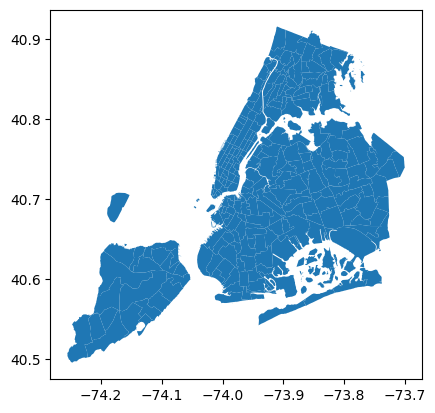

In [17]:
nyc_shapefile.plot()

In [18]:
result_df_means = result_df.copy()
result_df_means = result_df_means.transpose()
result_df_means['Mean'] = result_df_means.mean(axis=1)
result_df_means['Max'] = result_df_means.max(axis=1)
result_df_mean = result_df_means['Mean']
result_df_max = result_df_means['Max']

In [19]:
merged_df = pd.merge(nyc_shapefile, result_df_mean, left_on='location_i', right_index=True, how='left')
merged_df = pd.merge(merged_df, result_df_max, left_on='location_i', right_index=True, how='left')
merged_df_all = merged_df.copy()
merged_df = merged_df[merged_df['borough'].isin(['Manhattan'])]
#merged_df = merged_df[merged_df['zone'].isin(['Bloomingdale', 'West Village', 'Yorkville East', 'World Trade Center'])]
merged_df

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,Mean,Max
3,Manhattan,4,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",2.731236,44.0
9,Manhattan,24,24.0,0.000061,0.047000,Bloomingdale,"POLYGON ((-73.95954 40.79872, -73.96004 40.798...",6.035320,27.0
12,Manhattan,12,12.0,0.000042,0.036661,Battery Park,"POLYGON ((-74.01566 40.70483, -74.01540 40.704...",0.822848,14.0
13,Manhattan,13,13.0,0.000149,0.050281,Battery Park City,"POLYGON ((-74.01244 40.71906, -74.01282 40.717...",12.267798,52.0
40,Manhattan,41,41.0,0.000143,0.052793,Central Harlem,"POLYGON ((-73.94774 40.80960, -73.94506 40.808...",5.381623,26.0
...,...,...,...,...,...,...,...,...,...
246,Manhattan,244,244.0,0.000360,0.080569,Washington Heights South,"POLYGON ((-73.94069 40.85132, -73.94069 40.851...",1.417219,15.0
248,Manhattan,246,246.0,0.000281,0.069467,West Chelsea/Hudson Yards,"POLYGON ((-74.00440 40.76267, -74.00220 40.761...",35.525524,157.0
251,Manhattan,249,249.0,0.000072,0.036384,West Village,"POLYGON ((-74.00251 40.72902, -74.00282 40.728...",48.824089,260.0
261,Manhattan,261,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",10.430188,45.0


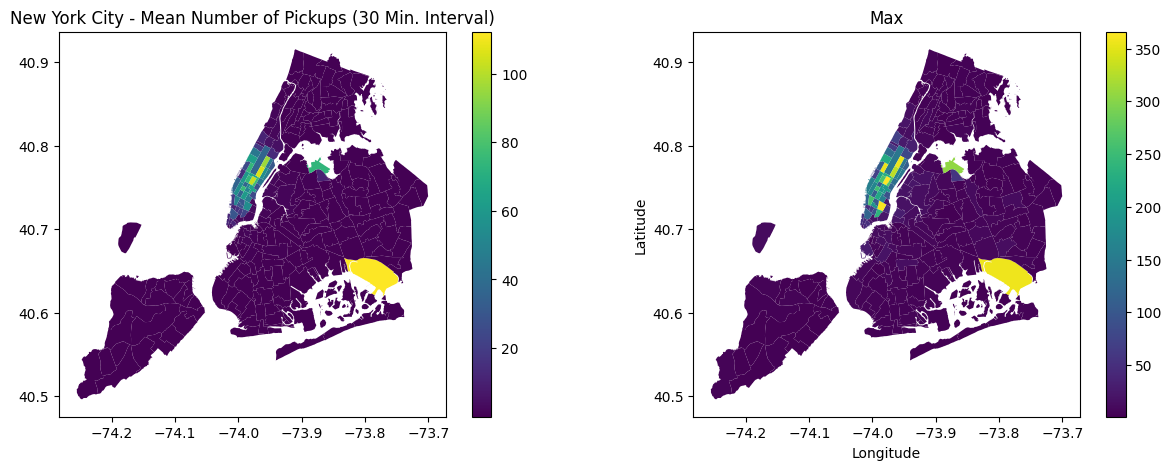

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 
cmap = plt.get_cmap('viridis')

merged_df_all.plot(column='Mean', cmap=cmap, linewidth=0.8, ax=ax1, legend=True)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax1.set_title('New York City - Mean Number of Pickups (30 Min. Interval)')

merged_df_all.plot(column='Max', cmap=cmap, linewidth=0.8, ax=ax2, legend=True)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Max')

plt.show()

In [21]:
temp_list = list(merged_df.location_i)

temp_list = [i for i in temp_list  if i != 103]

temp_list2 = [str(i) for i in temp_list]


manhattan_df = final_df[temp_list2]

yt_manhattan = result_df[temp_list]

pick_manhattan = result_df[temp_list]
drop_manhattan = result_df2[temp_list]

manhattan_df

,4,24,12,13,41,45,42,43,48,50,...,236,237,238,263,243,244,246,249,261,262
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,"(7, 6)","(6, 5)","(1, 0)","(3, 6)","(6, 6)","(5, 4)","(2, 4)","(47, 11)","(56, 8)","(28, 18)",...,"(61, 47)","(82, 25)","(43, 22)","(76, 36)","(0, 1)","(0, 3)","(36, 16)","(92, 17)","(4, 2)","(19, 20)"
2023-01-01 00:30:00,"(12, 9)","(14, 11)","(0, 0)","(11, 17)","(17, 26)","(5, 7)","(4, 11)","(46, 18)","(69, 60)","(51, 45)",...,"(85, 95)","(137, 78)","(93, 101)","(136, 110)","(1, 14)","(5, 7)","(51, 47)","(71, 47)","(9, 14)","(47, 78)"
2023-01-01 01:00:00,"(11, 11)","(8, 19)","(0, 0)","(11, 19)","(20, 37)","(10, 10)","(3, 19)","(38, 17)","(69, 68)","(63, 57)",...,"(52, 96)","(134, 65)","(84, 94)","(126, 146)","(1, 9)","(7, 10)","(61, 47)","(55, 48)","(6, 17)","(31, 79)"
2023-01-01 01:30:00,"(17, 20)","(4, 23)","(1, 0)","(7, 20)","(19, 30)","(7, 8)","(4, 16)","(43, 17)","(106, 96)","(62, 50)",...,"(48, 106)","(101, 45)","(71, 95)","(116, 144)","(2, 12)","(4, 18)","(39, 29)","(43, 45)","(15, 19)","(20, 95)"
2023-01-01 02:00:00,"(26, 31)","(9, 12)","(0, 3)","(5, 10)","(12, 24)","(13, 9)","(6, 23)","(19, 8)","(107, 93)","(70, 49)",...,"(40, 67)","(68, 40)","(45, 74)","(109, 117)","(5, 18)","(3, 20)","(38, 28)","(62, 54)","(13, 25)","(16, 71)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 21:30:00,"(2, 14)","(5, 20)","(1, 2)","(17, 30)","(3, 27)","(2, 4)","(1, 12)","(55, 30)","(101, 83)","(23, 42)",...,"(90, 196)","(257, 136)","(36, 96)","(53, 101)","(0, 10)","(1, 10)","(64, 58)","(106, 66)","(12, 22)","(22, 86)"
2023-05-31 22:00:00,"(2, 20)","(3, 10)","(0, 1)","(7, 22)","(7, 30)","(0, 6)","(2, 15)","(45, 35)","(111, 76)","(24, 35)",...,"(71, 195)","(206, 139)","(35, 99)","(56, 104)","(0, 7)","(0, 8)","(34, 44)","(93, 52)","(5, 12)","(19, 88)"
2023-05-31 22:30:00,"(5, 23)","(2, 9)","(0, 0)","(8, 24)","(4, 38)","(4, 8)","(2, 15)","(23, 23)","(139, 77)","(34, 32)",...,"(50, 144)","(121, 89)","(19, 94)","(54, 87)","(0, 19)","(1, 10)","(32, 48)","(103, 69)","(12, 11)","(11, 63)"


In [ ]:
manhattan_df.to_csv('manhattan.csv')

In [ ]:
pick_manhattan.to_csv('manhattan_pickup.csv')
drop_manhattan.to_csv('manhattan_dropoff.csv')